In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<figure>
<IMG SRC="images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Week 4: More spectral properties and discrete spectra


<figure>
<IMG SRC="http://hornby.seos.uvic.ca/~jklymak/images/KrhoBinnedDispSpec.png" WIDTH=320 ALIGN="right" STYLE="padding-left:20px" ALT="Turbulence and internal wave spectra in the ocean">
</figure>

As we saw in the [Introduction](Lecture-00-Intro-Python), it possible to have two time series that have completely different character, but the same univariate statistics.  i.e. their underlying probability distribution densities can be exactly the same, but the ordering of the data matters.  

Here we define the meaning of a **Stationary Time Series** and discuss two of the most straight forward ways of characterizing the relation of that time series in time, the **Lag Covariance** and the **Spectral Density**.

## Bandwidth considerations

An important property of spectra is that the broader the signal is in time, the narrower it is in spectral space, or vice-versa.  This is somewhat non-intuitive, so lets look at a couple of examples.

### Examples:

**Ex 1** First, consider the power spectrum of a delta function in time $x(t)=\delta(t-t_0)$.   This is as localized a signal in time as possible.  The Fourier Transform is:

\begin{align}
    X(f,T) &= \int_{0}^{T} \mathrm{e}^{-j2\pi f t} \delta(t-t_0)\ \mathrm{d}t\\
    &=\mathrm{e}^{-j2\pi f t_0}
\end{align}

So the power spectrum is approximated by:

\begin{align}
    S_{xx}(f,T) &= \frac{1}{T}X^*(f,T)X(f,T)\\
        &=\frac{1}{T} \mathrm{e}^{+j2\pi f t_0}\mathrm{e}^{-j2\pi f t_0}\\
        &=\frac{1}{T}
\end{align}

This is just a constant for all $f$.  So, a very narrow signal in $t$ leads to a very broad signal in $f$.  

**Ex 2** No consider a Gaussian in $t$ of standard deviation $b$:

\begin{equation}
    x(t)=\exp\left({\frac{-t^2}{2b^2}}\right)
\end{equation}

Then the Fourier Transform is just:

\begin{align}
    X(f,T) &= \int_{-T}^{T} \mathrm{e}^{\frac{-t^2}{2b^2}} \mathrm{e}^{-j2\pi f t}\ \mathrm{d}t\\
    &=\sqrt{\frac{\pi}{2}}b\ \mathrm{e}^{-\frac{4\pi^2f^2b^2}{2}}
\end{align}

or in terms of the spectral density:

\begin{align}
    S_{xx}(f) &= \frac{\pi b^2}{2}\ \mathrm{e}^{-4\pi^2f^2b^2}
\end{align}

which is a Gaussian with width $\frac{1}{\sqrt{8\pi a}}$.  Therefore, a narrow Gaussian signal in time will yield a wide Gaussian signal in frequency, and vice-versa.

### Formal Proof:

First, normalize $x(t)$ so that 

\begin{equation}
       \int x^2(t)\ \mathrm{d} t =   \int X^2(f)\ \mathrm{d} f =  1
\end{equation}

And define the bandwidth of the signals in time and frequency as: 

\begin{align}
    T_o^2 & \equiv \int_{-\infty}^{\infty} t^2 x^2(t)\ \mathrm{d}t\\
    B_o^2 & \equiv \int_{-\infty}^{\infty} f^2 X^2(f)\ \mathrm{d}f\\   
\end{align}

Then $T_o^2B_o^2\geq\frac{1}{\left(4\pi\right)^2}$, which says that as the badnwidth in time goes down, it has to go up in frequency, or vice-versa.  

The choice of the form of the bandwidth functions, $T_o$ and $B_o$ is somewhat arbitrary, but clearly both $x(t)$ and $X(f)$ have to fall off faster than $t^{-3}$ and $f^{-3}$ respectively for the bandwidths to be limited.  

We next note that $B_o$ is related to the integral of $\dot{x}(t)=dx/dt$ squared:

\begin{align}
    \left(2\pi\right)^2B_o^2 & = \int_{-\infty}^{\infty} \left(2\pi f\right)^2\left|X(f)\right|^2\ \mathrm{d}f\\
    & = \int_{-\infty}^{\infty} \left|FT (\dot{x}) \right|^2\ \mathrm{d}f\\
    & = \int_{-\infty}^{\infty} \dot{x}^2(t) \mathrm{d}t\\    
\end{align}

So, then we have $B_o$ in terms of a function of $x$ instead of $X$.  We use the [Cauchy-Schwarz inequality](http://en.wikipedia.org/wiki/Cauchy–Schwarz_inequality) which says that 

\begin{equation}
    \int \left| f(t) \right|^2\ \mathrm{d}t    \int \left| g(t) \right|^2\ \mathrm{d}t \geq \left(\int f\,g\ \mathrm{d}t \right)^2
\end{equation}

to argue that:

\begin{align}
    T_o B_o & = \frac{1}{2\pi} \left(\int_{-\infty}^{\infty} t^2x^2\ \mathrm{d}t \right)^{1/2}  \left( \int_{-\infty}^{\infty} \dot{x}^2\ \mathrm{d}t\right)^{1/2} \\
    & \geq \frac{1}{2\pi} \int_{-\infty}^{\infty} t x \dot{x}\ \mathrm{d}t\\
    & \geq \frac{1}{4\pi} \int x^2\ \mathrm{d}t\\
    & \geq \frac{1}{4\pi}
\end{align}

where the third step follows from integration by parts, and the fourth from the fact that we normalized $x(t)$ so that the integral here was $1$.  

## Cross spectrum and Coherence

So far we have shown a few results with the cross spectrum $G_{xy}(f)$ derived from the cross lag-correlation:

\begin{equation}
    G_{xy}(f)\equiv 2 \int_0^{\infty}R_{xy}(\tau)\ \mathrm{e}^{-j2\pi f\tau}\ \mathrm{d}\tau
\end{equation}

This defines the frequency dependence of the relations ship between $x(t)$ and $y(t)$.  

This is more powerful than a straight linear regression between the two time series, in that even quite burried signals can be seen to be significantly correlated at certain frequencies.  Consider the following examples where there is a sine wave with frequency of $f=0.033\ \mathrm{Hz}$ burried in each signal that is completely swamped by noise:

<IPython.core.display.Javascript object>


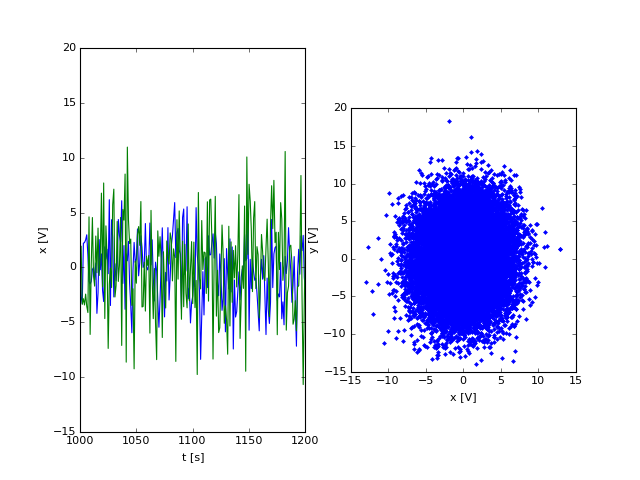

0.00158665957432


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

N=20000
t=np.arange(N)
x = 1.*np.sin(t*2.*np.pi/30.)+3.*np.random.randn(N)
y = 1.*np.sin(t*2.*np.pi/30.+0.6)+4.*np.random.randn(N)
fig,ax=plt.subplots(1,2)
ax[0].plot(t,x)
ax[0].plot(t,y)
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('x [V]')
ax[0].set_xlim(1000,1200)

ax[1].plot(x,y,'.')
ax[1].set_xlabel('x [V]')
ax[1].set_ylabel('y [V]')
ax[1].set_aspect(1)
# compute r^2
rsq=np.mean(x*y)**2/np.var(x)/np.var(y)
print rsq

Hopefully its apparent that these two time series are, on the whole, linearly uncorrelated. The $\rho^2_{xy}\approx 0$.  However if we consider the absolute value of the cross-spectrum: 

<IPython.core.display.Javascript object>


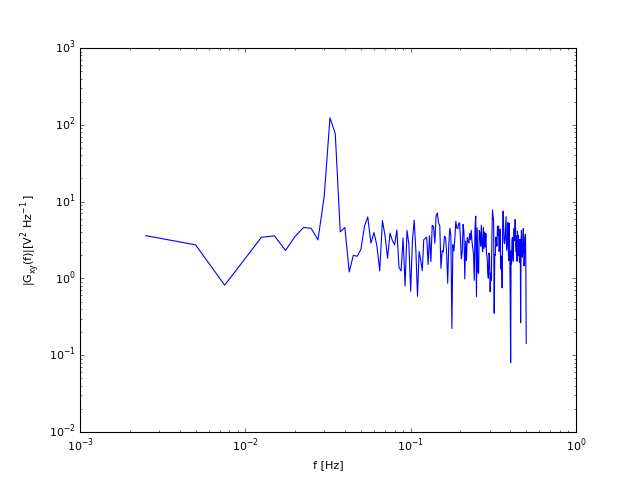

In [8]:
from matplotlib import mlab
Gxy,f = mlab.csd(x,y,NFFT=400,Fs=1.) # Don't use mlab.csd until you prove it works!
fig,ax=plt.subplots(1,1)
ax.loglog(f,np.abs(Gxy))
ax.set_xlabel('f [Hz]');ax.set_ylabel('$|G_{xy}(f)| [V^2 Hz^{-1}]$');

We find a strong peak at the frequency of the sine waves, which indicates the two waves are correlated.  

The functions we input had a $0.6$ radian phase shift, and the cross-sepctrum gives information about that as well.  Since $G_{xy}$ is complex, the phase is given by $Im(G_{xy})/Re(G_{xy}) = \tan \phi$.  Looking at our estimate, we see that

In [11]:
ind = np.where(abs(Gxy)>1.e2)[0]

pha = np.arctan2(np.imag(Gxy[ind]),np.real(Gxy[ind]))
print pha

[ 0.71326976]


And we see that the phase shift is relatively well captured.  

More formally.  If $G_{xy}(f)$ is complex, then we can split into the co-incident and quadrature parts of the cross-spectrum:

\begin{equation}
    G_{xy}(f)=C_{xy}(f)-jQ_{xy}(f)
\end{equation}

or in terms of amplitude and phase:

\begin{equation}
    G_{xy}(f)=|G_{xy}(f)|\mathrm{e}^{-j\theta_{xy}(f)}
\end{equation}

where $\tan\left(\theta_{xy}(f)\right)=\frac{Q_{xy}(f)}{C_{xy}(f)}$.

Like for the Correlation Coefficient, we define a **Coherence Squared Function** by normalizing by the spectral desnity of our two signals:

\begin{equation}
    \gamma_{xy}^2 \equiv \frac{\left|G_{xy}(f)\right|}{G_{xx}(f)G_{yy}(f)} \leq 1
\end{equation}

We can prove the inequality by the same quadratic trick we used for the Correlation Co-efficient.  


### Example: Time delay

As another example, consider a function $y(t)$ that is a noisy and delayed version of $x(t)$, i.e.

\begin{equation}
    y(t)=a \, x(t-\tau_0) + n(t)
\end{equation}

Where $n(t)$ is noise that is not correlated with $x(t)$.  Then we can calculate $R_{xy}(\tau)$:

\begin{align}
    R_{xy}(\tau)&=E\left[ x(t)y(t+\tau) \right]\\
    &=E\left[ a x(t)x(t-\tau_0+\tau) +x(t)n(t)\right]\\
    &=aE\left[x(t)x(t-\tau_0+\tau)\right]\\
    &=a\,R_{xx}(\tau-\tau_0)
\end{align}

So by a simple change of variables:

\begin{align}
    G_{xy}(f)=a\, G_{xx}(f)\ \mathrm{e}^{-j2\pi f\tau}
\end{align}

and we see that 

\begin{align}
    \left|G_{xy}(f)\right|=a\, G_{xx}(f)
\end{align}

and

\begin{align}
    \theta_{xy}(f)&=\arctan \left(\frac{-\sin(2\pi f\tau_0)}{\cos(2\pi f\tau_0}\right)\\
    & = 2\pi f\tau_0
\end{align}

We also note that the coherence squared is

\begin{align}
    \gamma_{xy}^2 &= \frac{\left| G_{xy}\right|^2}{G_{xx}G_{yy}}\\
    &=\frac{\left|G_{xx}\right|^2}{G_{xx}^2+G_{xx}G_{nn}}
\end{align}

So as the noise gets smaller, this approaches 1, whereas a stronger noise signal reduces the coherence.

Here we test this numerically, with $a=1$, and a delay of $\tau_0=10\ \mathrm{s}$:

<IPython.core.display.Javascript object>


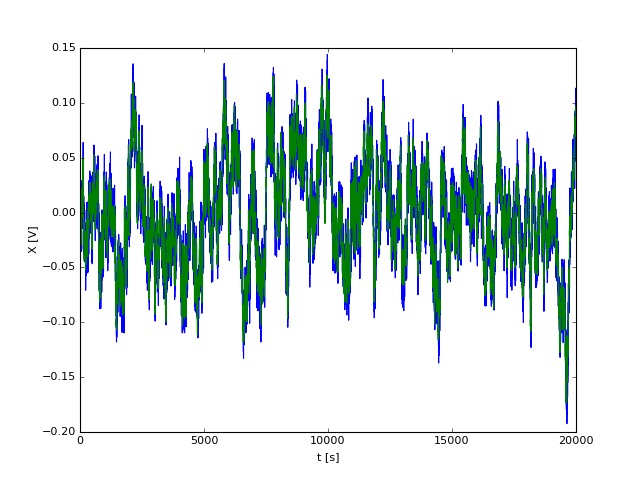

In [13]:
N=20000
x=np.zeros(N)
for i in range(1,N):
    x[i]=np.random.randn(1)*0.005+0.995*x[i-1]
y=0.5*x
y[10:] = 1.*x[:-10]+np.random.randn(N-10)*0.01
fig,ax=plt.subplots(1,1,)
ax.plot(y);ax.plot(x)
ax.set_xlabel('t [s]');ax.set_ylabel('X [V]')


<IPython.core.display.Javascript object>


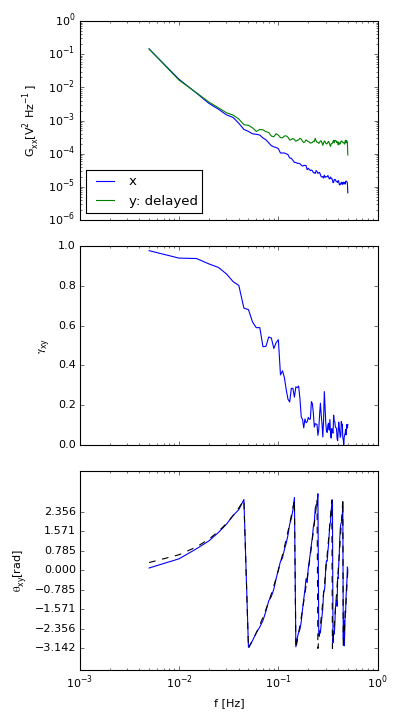

/Users/jklymak/anaconda/lib/python2.7/site-packages/matplotlib/mathtext.py:860: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


In [15]:
Gxy,f=mlab.csd(x,y,Fs=1,NFFT=200)
Gxx,f=mlab.psd(x,Fs=1,NFFT=200)
Gyy,f=mlab.psd(y,Fs=1,NFFT=200)
fig,ax=plt.subplots(3,1,sharex=True,figsize=(5,9))
ax[0].loglog(f,Gxx,label='x')
ax[0].loglog(f,Gyy,label='y: delayed')
ax[0].legend(loc=3)
ax[0].set_ylabel(r'$G_{xx} [V^2 Hz^{-1}]$')
ax[1].semilogx(f,np.abs(Gxy)**2/Gxx/Gyy)
ax[1].set_ylabel(r'$\gamma_{xy} $')
ax[2].semilogx(f,np.arctan2(-np.imag(Gxy),np.real(Gxy)))
ax[2].semilogx(f,np.mod(2*np.pi*f*10.+np.pi,2*np.pi)-np.pi,'k--')
ax[2].set_ylabel(r'$\theta_{xy} [rad]$')
ax[2].set_xlabel('f [Hz]')
ax[2].set_yticks(np.arange(-np.pi,np.pi,np.pi/4))

plt.tight_layout()

So, here we see a fair bit of information.  The spectra of the two time series look the same until the noise spectrum starts to dominate at high frequencies.  This leads to a corresponding drop in the coherence squared at high frequencies (second panel).  The time offset is readily apparent in the third panel (note the wrapping at $\pm\pi$).  The dashed line is what we would expect from a 10-s phase lag between $x$ and $y$.

## Discrete Power Spectra

Of course in the plots I've made above, I have been using discrete power spectra, but there are a number of caveats to be kept in mind when dealing with discrete data. 


### Discrete time series

If we have a real time series $x(t)$, then in real life we discretely sample it, lets say every $\Delta t$ seconds to get a series of data at 

\begin{align}
    t_n &\equiv n\,\Delta t\\
    x_n &\equiv x(t_n)
\end{align}

Sampling at even intervals is completely a convenience, and not all time series have this luxury!  However, you can usually bin or interpolate your data to get it onto a regular grid without losing too much fidelity.

We also can only sample for a finite amount of time, say $T$ seconds, and therefore our time series will be of finite length:

\begin{align}
      T=N\, \Delta t
\end{align}

We define $f_S =\frac{1}{\Delta t}$ as the **sampling frequency**.

### Digital Fourier Transform

Formally the Fourier Transform of $x(t)$ is 

\begin{equation}
    X(f)=\lim_{T\to\infty} \int_0^{T} x(t)\ \mathrm{e}^{-j2\pi f t}\ \mathrm{d}t
\end{equation}

The digital approximation is simply

\begin{align}
    X(f_k)&=\sum_{n=1}^{N} x_n\ \mathrm{e}^{-j2\pi f_k t_n}\ \Delta t\\
    &=\frac{T}{N}\sum_{n=1}^{N} x_n\ \mathrm{e}^{\frac{-j2\pi f_k n T}{N}}
\end{align}

Now, if we are smart about how we choose our values of $f_k$ we can efficiently decompose $x_n$.  To do so, we choose: 
\begin{align}
    f_k &= \frac{k}{T} && \text{for } k=0,1,...,N/2
\end{align}

then

\begin{align}
    X(f_k)&=\frac{T}{N}\sum_{n=1}^{N} x_n\ \mathrm{e}^{\frac{-j2\pi k n }{N}}\\
    &= \frac{T}{N}\left(\sum_{n=1}^{N} x_n\ \cos\left(\frac{2\pi k n }{N}\right) -j \sum_{n=1}^{N} x_n\ \sin\left(\frac{2\pi k n }{N}\right)\right)\\
        &= \frac{T}{N}\sum_{n=1}^{N} x_n\ C_{k}(n) - j\frac{T}{N}\sum_{n=1}^{N} x_n\ S_{k}(n)
\end{align}

There are a couple of edge cases to consider in this.  For $k=0$ and $N/2$, $S_k(n)=0$, so we can ignore those.  Also note that $C_0(n)=1$ and $f_0=0$, so 

\begin{align}
    X(f_0)&=\frac{T}{N}\sum_{n=1}^{N} x_n\\
    &= T\ \overline{x}
\end{align}

represents the *mean* of $x_m$ (times $T$).  

Why do we only use $N/2$ frequencies?  There are two reasons.  First, there are $N/2-1$ values for $S_k(n)$, and there are $N/2+1$ values for $C_k(n)$, so in total this choice of $f_k$ yields us $N$ Fourier co-efficients.  From an information point of view, if each of those $N$ co-efficients is *independent* then there is as much information in the Fourier decomposition as there is in the original time series, i.e. our tranform is lossless.

Second, the highest frequency $f_{N/2}=\frac{1}{2\Delta t}$ is a sine wave that will only have two samples in it. That is the minimum needed to define the sine wave, and therefore is the highest frequency we can resolve.  $f_{N/2}=\frac{1}{2}f_S$ is fundamental to time-series analysis and is called the **Nyquist Frequency**.

### Sin and Cos form a basis that spans the time series

It is possible to choose any $f$ to calculate a Fourier Component, but we use the discrete $f_k$ as defined because the resulting $C_k(n)$ and $S_k(n)$ are vectors that as a set form an orthogonal basis that spans the space $x_n \in \mathbb{R}^N$.  It is relatively straightforward to show that the basis vectors are orthogonal:

\begin{align}
    \mathbf{C}_k\cdot \mathbf{C}_l & = \sum_{n=1}^N \cos\left(\frac{2\pi k n}{N} \right) \cos\left(\frac{2\pi l n}{N} \right)\\
    &= \sum_{n=1}^N \frac{1}{2} \left(
        \cos\left(\frac{2\pi n}{N} (k+l)\right) + 
        \cos\left(\frac{2\pi n}{N} (k-l)\right) 
        \right)\\
    &= \frac{N}{2}\, \delta(k-l)  \\
     \mathbf{S}_k\cdot \mathbf{S}_l &= \frac{N}{2}\,\delta(k-l)\\
    \mathbf{C}_k\cdot \mathbf{S}_l &= 0\\
\end{align}

This then lets us write $x_n$ in a matrix equation:

\begin{align}
    \mathbf{x}& = \frac{2}{N}\mathrm{F} \mathbf{X^0}
\end{align}

where the columns of the matrix $\mathrm{F}$ are 

\begin{align}
       \mathrm{F}&=[ \mathbf{C}_{0}, \mathbf{C}_{1}, ... \mathbf{C}_{N/2}, \mathbf{S}_1,\mathbf{S}_2,...\mathbf{S}_{N/2-1}]
\end{align}

Note that $\mathrm{F}$ is $NxN$.  Since the vectors in the matrix $\mathrm{F}$ are independent the matrix is invertable, and we can solve the matrix equation to get the Fourier co-efficients:

\begin{align}
    \mathbf{X^0}& = \frac{N}{2}\mathrm{F}^{-1} \mathbf{x}
\end{align}

The advantage of thinking about these as matrices are three-fold.  First, there are a number of computer algorithms for inverting matrices that are quite efficient compared to perfoming the sums by hand.  Second, once you invert $\mathrm{F}$ once, it can be applied to other vectors $\mathbf{x}$ that you may need to calculate the Fourier transform of.  Third, sines and cosines are not the only possible orthogonal basis of $\mathbb{R}^n$, so this technique may be more applicable.  For instance there are cases where the waves that propagate in time (or space) may have a different (known) form than a sine wave.  For instance if you have a wave propagating through an inhomogenous media, the sine wave will be distorted, but there may exist a basis function to decompose your signal into.

To get the Fourier transform from the product of the inversion, we form complex numbers out of the appropriate entries in the matrix, and we apply the proper normalization:

\begin{align}
    X_k& = \frac{T}{N}X^0_k-j\frac{T}{N} X^0_{k+N/2} && \text{for } k=1,2,...,N/2-1\\
    X_0&=\frac{T}{N}X^0_0 && \text{for } k=0\\
    X_{N/2}&=\frac{T}{N}X^0_{N/2} && \text{for } k=N/2\\ 
\end{align}

giving $N/2+1$ co-efficients, $N/2-1$ of them imaginary, the other two real.  

### Using computing packages to compute the Fourier Transform

Many computing packages provide routines to calculate the Fourier transform, often using a very quick algorithm called the *Fast Fourier Transform*.  In general, you can use this algorithm.  In python it is called as:

In [18]:
x = np.cumsum(np.random.randn(400))
X = np.fft.fft(x)
print np.shape(X)
print X[:6]
print X[-5:]
print 'X[N/2]= %1.3e %+1.3ei '%(X[200].real,X[200].imag)
print 'sum x: %1.3f'%np.sum(x)

(400,)
[ 6939.81683831   +0.j           337.56386658+2293.61434898j
    38.43233748+2091.71264929j   287.73663901 +775.72214725j
    50.60860807+1047.02881806j   182.44177424 +843.38411605j]
[ 182.44177424 -843.38411605j   50.60860807-1047.02881806j
  287.73663901 -775.72214725j   38.43233748-2091.71264929j
  337.56386658-2293.61434898j]
X[N/2]= -3.704e+01 +4.086e-14i 
sum x: 6939.817


So, what happened here?  Its a good idea to check the [manual](http://docs.scipy.org/doc/numpy/reference/routines.fft.html), but their implimentation of the FFT returns $N$ entries from $k=0...N-1$.  However, above, I said that we only go from $k=0...N/2$.  However, look at the first few entries for $X$ and the last few.  They are mirror images of one another, and therefore this implimentation of FFT has returned extraneous information.

You can also note that $X_{N/2}$ is (to machine precision) real, as we expected from above.  

Finally note that $X_0=\sum x_n$, also as expected.  

There is usually an inverse FFT that we call as below.  Note that it returns the correct answer, again within machine precision.

In [19]:
xinv=np.fft.ifft(X)
print xinv[:10]
print x[:10]

[-0.55145917 +1.73638881e-15j -1.66816803 -1.34559031e-15j
 -0.99621976 -5.19154609e-15j -1.37562181 +4.10782519e-15j
 -2.00659662 +1.93045580e-14j -3.38316970 -1.07425180e-14j
 -2.60799393 +3.33525319e-15j -3.44388475 -2.11874962e-14j
 -4.33911080 +2.20223839e-14j -5.61199721 +9.45465928e-15j]
[-0.55145917 -1.66816803 -0.99621976 -1.37562181 -2.00659662 -3.3831697
 -2.60799393 -3.44388475 -4.3391108  -5.61199721]


Note also that `fft` does *not* include the proper units in front of $\Delta t=\frac{T}{N}$, so if your time series is sampled at a different rate than $\Delta t=1$, and you use `fft`, you need to add the appropriate normalization. 

## Discrete Power Spectra

We rarely consider just the Fourier transform, but rather the power spectra or cross-spectra, $G_{xx}(f)$ and $G_{xy}(f)$  Recall that 

\begin{equation}
    G_{xx}(f) = 2 \lim_{T\to\infty} \frac{1}{T} E\left[ \left|  X(f,T) \right|^2 \right]
\end{equation}

so it is natural to approximate the discrete spectrum using the discrete Fourier Transform:

\begin{equation}
    \hat{G}_{xx}(f_k) = \frac{2}{T} X_k^*X_k
\end{equation}

Note again the units: $X_k$ has units of $\mathrm{V^2\,s^2}$, so $\hat{G}_{xx}(f_k)$ has units of 
$\mathrm{V^2\,s}=\mathrm{V^2\,Hz^{-1}}$.


### Statistics of the spectral estimate?

The estimate of $\hat{G}_{xx}(f_k)$ is a random variable, and of course has a probability distribution that we can estimate.  Note that 

\begin{equation}
    X_k^*X_k = \mathbb{R}\left(X_k\right)^2+\mathbb{I}\left(X_k\right)^2
\end{equation}

If we assume that $\mathbb{R}(X_k)$ and $\mathbb{I}(X_k)$ are random independent variables, each with a normal distribution and a varaince estimate of $\sigma^2=\hat{G}_{xx}(f_k)/2$ (this not always true, but as we see below we will end up averaging a number of estimates together, which due to the Central Limit Theorem will make this closer to true in all cases), then $(X_k^*X_k)/\sigma^2$ follows a [$\chi^2_n$ distribution](http://en.wikipedia.org/wiki/Chi-squared_distribution) with $n=2$ degrees of freedom.

If we want the 95% confidence interval that denotes where we expect the true value of $G_{xx}(f)$ to be then:

\begin{equation}
    \frac{\left. \chi^2_n \right|_{0.025}}{n} \leq \frac{\hat{G}_{xx}/2}{G_{xx}/2} \leq \frac{\left. \chi^2_n \right|_{0.975}}{n}
\end{equation}

or in a manner that is what we might plot as error bars on a plot:

\begin{equation}
    \frac{n\hat{G}_{xx}/2}{\left. \chi^2_n \right|_{0.975}} \leq {G_{xx}/2} \leq \frac{n\hat{G}_{xx}/2}{\left. \chi^2_n \right|_{0.025}}
\end{equation}

where again, $\hat{G}_{kk}$ is our best guess at the variance of $\mathbb{R}(X_k)^2$.

### Example error estimate:

<IPython.core.display.Javascript object>


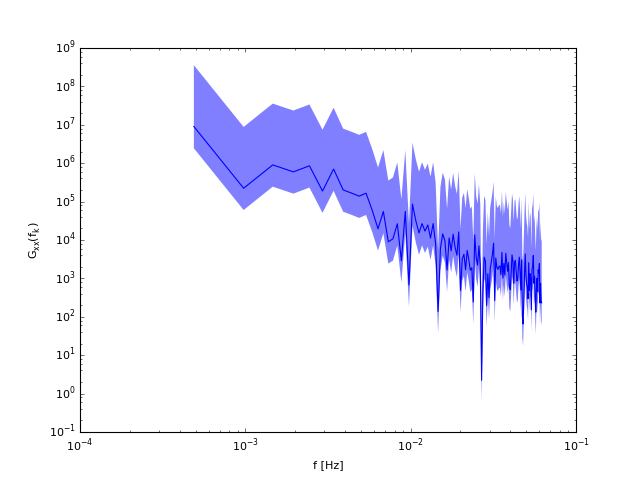

In [20]:
N= 256
T = 2048.
dt = T/N
import scipy.stats as stats
fig,ax=plt.subplots(1,1)
x=np.cumsum(np.random.randn(N))
f = np.arange(N/2)/T
X = np.fft.fft(x)
G = np.real(dt*np.conj(X[:N/2])*X[:N/2])
ax.loglog(f[1:],G[1:])
inter = stats.chi2.interval(0.95,df=2)
ax.fill_between(f[1:],2.*G[1:]/inter[1],2.*G[1:]/inter[0],alpha=0.5,
                linewidth=0.0,edgecolor=None,color=None,facecolor='b')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('$G_{xx}(f_k)$')


Note that $G_{xx}(f_k)$ is pretty poor. $2/\chi_2^2|_{0.025}=39.5$, and $2/\chi_2^2|_{0.025}=0.27$, so there is two orders of magnitude uncertainty in the estimate which is probably not good enough.  In the next lecture we discuss ways to reduce this variance.